# **Exploratory Data Analysis PROJECT-->**
# **GOOGLE APP STORE DATA**


**Setting up the Environment:**

In [1]:
#Importing the important Python modules for our project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset into a Pandas DataFrame
df=pd.read_csv('googleplaystore.csv')

In [3]:
#Displaying the first five rows of the dataset
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Data Types and Structures**

In [4]:
#Display the data types of each column in the DataFrame
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [5]:
#Display descriptive statistics for numerical columns in the DataFrame
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
#Display the sum of null values
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
#Display the sum of Duplicated values
df.duplicated().sum()

483

In [8]:
#Handling Missing Values
for i in df.columns:
    if df[i].dtype == 'object':
        df[i].fillna(df[i].mode()[0], inplace=True)
    else:
        df[i].fillna(df[i].mean(), inplace=True)
#Dealing with Duplicates
df.drop_duplicates(inplace=True)

In [9]:
print('Null values:\n',df.isna().sum(),'\n')
print('Duplicated values:',df.duplicated().sum())

Null values:
 App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64 

Duplicated values: 0


In [10]:
#Display the complete information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          10358 non-null  float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10358 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10358 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10358 non-null  object 
 12  Android Ver     10358 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [49]:
#Filter data based on a condition (Top Rated APPs)
top_apps=df[df['Rating']>=4]['App'].sort_values(ascending=False).head()
print("Top 5 apps on the basis of Rating:\n",top_apps)
#Filter Data on the basis of category
top_category=df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head()
print("Top 5 categories on the basis of Rating:\n",top_category)

Top 5 apps on the basis of Rating:
 882     🔥 Football Wallpapers 4K | Full HD Backgrounds 😍
7559    📏 Smart Ruler ↔️ cm/inch measuring for homework!
2575       💘 WhatsLov: Smileys of love, stickers and GIF
6334                             뽕티비 - 개인방송, 인터넷방송, BJ방송
6420                                         감성학원 BL 첫사랑
Name: App, dtype: object
Top 5 categories on the basis of Rating:
 Category
1.9                    19.000000
EDUCATION               4.374564
EVENTS                  4.363647
ART_AND_DESIGN          4.350462
BOOKS_AND_REFERENCE     4.311943
Name: Rating, dtype: float64


In [21]:
#Sort the DataFrame by a specific column (e.g., Category in ascending order)
df.sort_values(by='Category',ascending=True).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up
35,How to draw Ladybug and Cat Noir,ART_AND_DESIGN,3.8,564,9.2M,"100,000+",Free,0,Everyone,Art & Design,"July 11, 2018",2.1,4.1 and up
36,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,8145,24M,"500,000+",Free,0,Everyone,Art & Design;Creativity,"August 2, 2018",1.0.9,4.4 and up
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
39,How To Color Disney Princess - Coloring Pages,ART_AND_DESIGN,4.0,591,9.4M,"500,000+",Free,0,Everyone,Art & Design,"March 31, 2018",1,4.0 and up


In [22]:
#Group data based on a column
df.groupby(by='Genres')['Rating'].mean().reset_index()

,Genres,Rating
0,Action,4.277678
1,Action;Action & Adventure,4.313333
2,Adventure,4.181156
3,Adventure;Action & Adventure,4.423077
4,Adventure;Brain Games,4.600000
...,...,...
115,Video Players & Editors,4.075145
116,Video Players & Editors;Creativity,4.100000
117,Video Players & Editors;Music & Video,4.000000
118,Weather,4.239675


In [23]:
#Add a new column to the DataFrame (e.g., average Rating of each App Genre)
df['AverageRating']=df.groupby(by='Genres')['Rating'].transform('mean')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,AverageRating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,4.353219
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,3.900000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,4.353219
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,4.353219
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,4.400000


In [24]:
#Display the counts of each App Type:
df['Type'].value_counts()

Type
Free    9592
Paid     765
0          1
Name: count, dtype: int64

In [25]:
#Display the counts of each App Type %
df['Type'].value_counts(normalize=True)*100

Type
Free    92.604750
Paid     7.385596
0        0.009654
Name: proportion, dtype: float64

In [30]:
#Replace non-numerical values in column 'Installs'
df['Installs']=df['Installs'].str.replace('+','')
df['Installs']=df['Installs'].str.replace(',','')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,AverageRating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,4.353219
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,3.900000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,4.353219
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,4.353219
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,4.400000


In [31]:
#Display the counts of each App Installs by Genre
df.groupby(by='Genres')['Installs'].value_counts().head()

Genres  Installs 
Action  10000000     79
        1000000      55
        100000       41
        5000000      35
        100000000    33
Name: count, dtype: int64

In [32]:
#Display the counts of each App Installs by Genre %
df.groupby(by='Genres')['Installs'].value_counts(normalize=True)*100

Genres  Installs 
Action  10000000     22.191011
        1000000      15.449438
        100000       11.516854
        5000000       9.831461
        100000000     9.269663
                       ...    
Word    10000         7.142857
        50            3.571429
        50000         3.571429
        500           3.571429
        100000        3.571429
Name: proportion, Length: 922, dtype: float64

In [33]:
#Mapping values to numerical values (Purchase_Type_mapping)
Purchase_Type_mapping={'Free':0,'Paid':1}
#Replace values in the column using this Mapping
df['PurchaseType']=df['Type'].map(Purchase_Type_mapping)
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,AverageRating,PurchaseType
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,4.353219,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,3.900000,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,4.353219,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,4.353219,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,4.400000,0.0


###  Statistical Analysis

#### Descriptive Statistics

In [34]:
#Displaying the Descriptive Statistics for our dataset
df.describe()

,Rating,AverageRating,PurchaseType
count,10358.000000,10358.000000,10357.000000
mean,4.190079,4.190079,0.073863
std,0.505406,0.171245,0.261561
min,1.000000,3.800000,0.000000
25%,4.100000,4.114105,0.000000
50%,4.200000,4.183479,0.000000
75%,4.500000,4.259550,0.000000
max,19.000000,19.000000,1.000000


#### Inferential Statistics

In [36]:
from scipy.stats import ttest_ind
#Hypothesis testing on purchase type and average rating
purchase_0=df[df['PurchaseType']==0]['AverageRating']
purchase_1=df[df['PurchaseType']==1]['AverageRating']
t_stat,p_value=ttest_ind(purchase_0,purchase_1)
#result
print('t-statistic:',t_stat)
print('p-value:',p_value)
#Interpret the result
if p_value<0.05:
    print('Reject Null Hypothesis. There is a significant difference between the groups.')
else:
    print('Fail to reject Null Hypothesis. There is no significant difference between the groups.')

t-statistic: -8.13064808842388
p-value: 4.758057948982377e-16
Reject Null Hypothesis. There is a significant difference between the groups.


In [37]:
from scipy.stats import f_oneway
#Perform ANOVA test using 'PurchaseType' and 'AverageRating'
groups = df.groupby('PurchaseType')['AverageRating'].apply(list)
test_result=f_oneway(*groups)
#ANOVA test result
print('F-statistic:', test_result.statistic)
print('p-value:', test_result.pvalue)
#Interpret the result
if test_result.pvalue < 0.05:
    print('There is a significant difference between the groups.')
else:
    print('There is no significant difference between the groups.')


F-statistic: 66.10743833778882
p-value: 4.758057948917268e-16
There is a significant difference between the groups.


###  Exploratory Data Analysis

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128152 (\N{HEART WITH ARROW}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48981 (\N{HANGUL SYLLABLE BBONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54000 (\N{HANGUL SYLLABLE TI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pyl

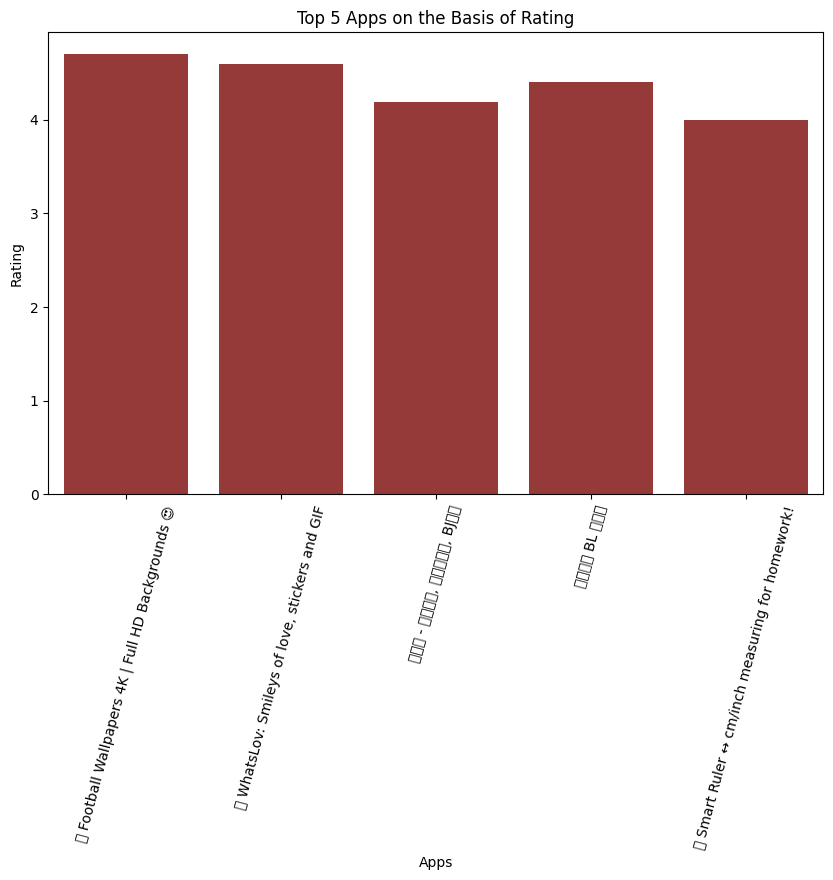

In [50]:
# Plot the top 5 apps on the basis of Rating
plt.figure(figsize=(10, 6))
sns.barplot(x=top_apps, y=df[df['App'].isin(top_apps)]['Rating'],color='Brown')
plt.title('Top 5 Apps on the Basis of Rating')
plt.xlabel('Apps')
plt.ylabel('Rating')
plt.xticks(rotation=75)
plt.show()

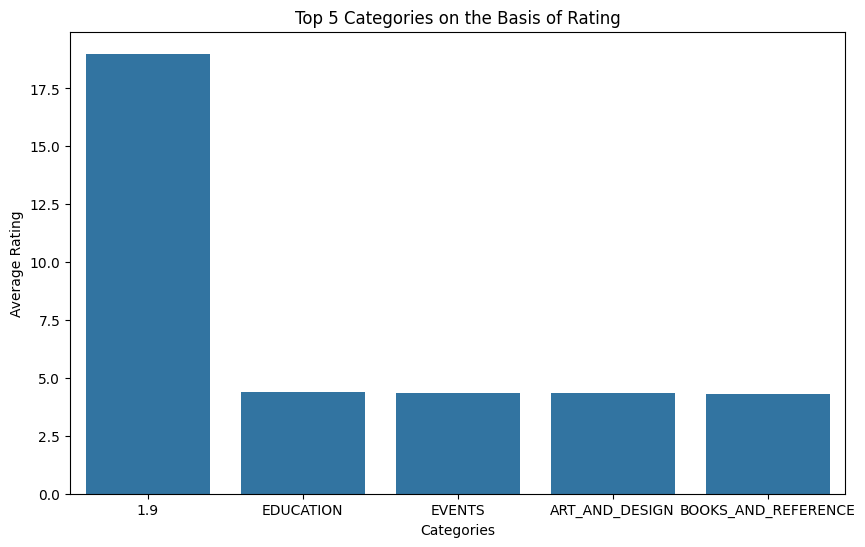

In [51]:
# Plot the top 5 categories on the basis of Rating
plt.figure(figsize=(10, 6))
sns.barplot(x=top_category.index, y=top_category.values)
plt.title('Top 5 Categories on the Basis of Rating')
plt.xlabel('Categories')
plt.ylabel('Average Rating')
plt.show()

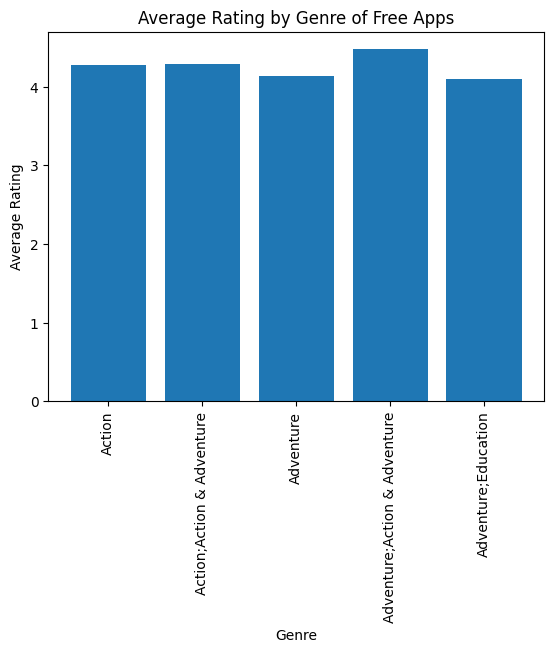

In [65]:
#Filter the DataFrame for free apps
df_free=df[df['Type']=='Free']
avg_rating_genre_free=df_free.groupby('Genres')['Rating'].mean().reset_index()
plt.bar(avg_rating_genre_free['Genres'].head(), avg_rating_genre_free['Rating'].head())
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Rating by Genre of Free Apps')
plt.xticks(rotation=90)
plt.show()


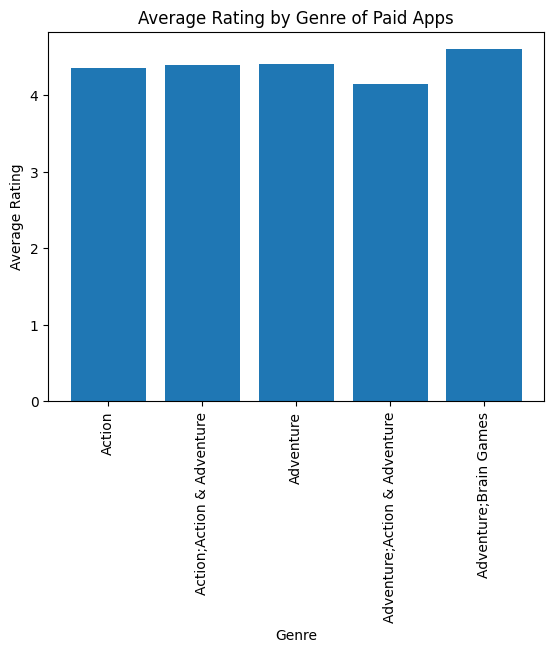

In [64]:
#Filter the DataFrame for paid apps
df_free=df[df['Type']=='Paid']
avg_rating_genre_free=df_free.groupby('Genres')['Rating'].mean().reset_index()
plt.bar(avg_rating_genre_free['Genres'].head(), avg_rating_genre_free['Rating'].head())
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Rating by Genre of Paid Apps')
plt.xticks(rotation=90)
plt.show()

#### Gaining Insights using Correlation matrix :

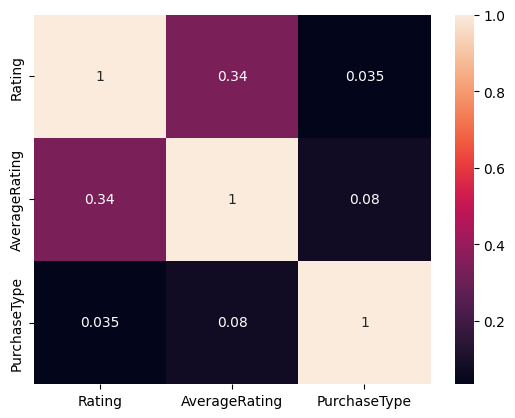

In [69]:
numerical_df = df.select_dtypes(include=['float', 'int'])
#Correlation matrix
corr_matrix=numerical_df.corr()
#heatmap of the correlations
sns.heatmap(corr_matrix, annot=True)
plt.show()

<Axes: xlabel='Genres', ylabel='Rating'>

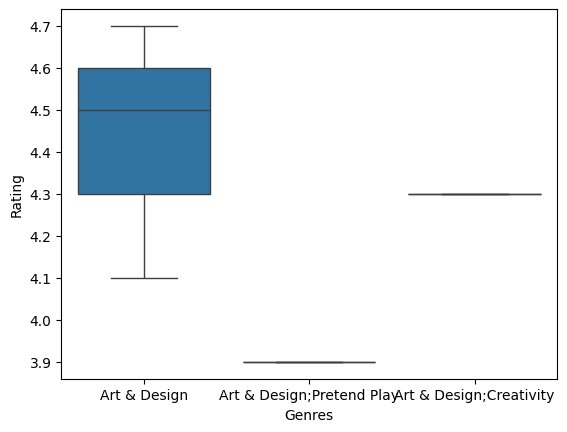

In [73]:
sns.boxplot(x='Genres', y='Rating', data=df.head())

<Axes: xlabel='Reviews', ylabel='Rating'>

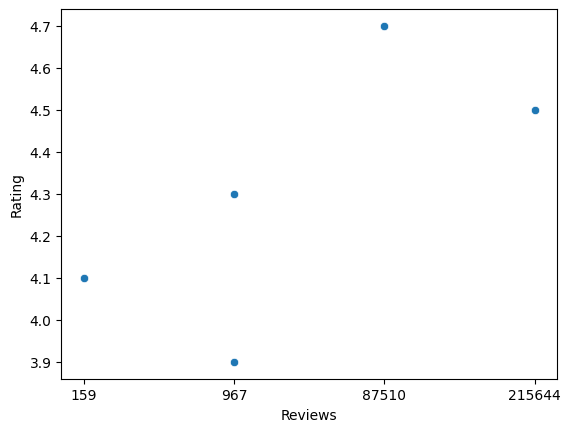

In [74]:
sns.scatterplot(x='Reviews', y='Rating', data=df.head())

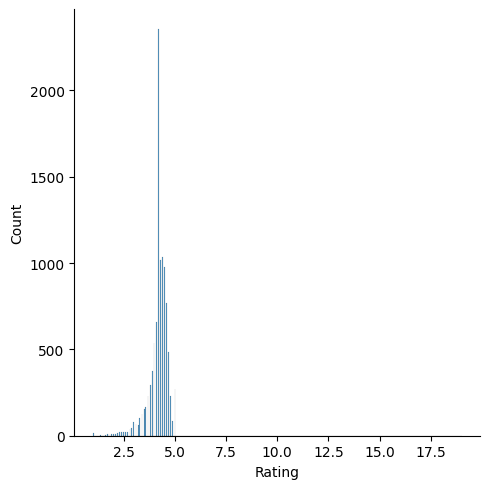

In [76]:
sns.displot(df['Rating'])